In [171]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [172]:
np.random.seed(42)

In [173]:
%env IEX_API_VERSION=iexcloud-sandbox
%env IEX_TOKEN=Tsk_5798c0ab124d49639bb1575b322841c4
%env ALPACA_API_KEY=PKQ9QXNTU9DD86IAWTJL
%env ALPACA_SECRET_KEY=YC1yh5LNOhfobsf1JKC2WwBNSOp/gZu9RjfRRx2w

env: IEX_API_VERSION=iexcloud-sandbox
env: IEX_TOKEN=Tsk_5798c0ab124d49639bb1575b322841c4
env: ALPACA_API_KEY=PKQ9QXNTU9DD86IAWTJL
env: ALPACA_SECRET_KEY=YC1yh5LNOhfobsf1JKC2WwBNSOp/gZu9RjfRRx2w


# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [174]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'
os.environ['IEX_TOKEN'] = os.getenv('IEX_TOKEN')

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [111]:
# set the list of tickers
list_of_tickers = ["SPY", "AGG"]

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for SPY & AGG
historical_data = get_historical_data(list_of_tickers, start_date, end_date, output_format='pandas')

historical_data

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2019-04-22  302.32  294.62  289.55  302.43   41981634  108.22  110.98  111.62   
2019-04-23  300.84  301.83  300.55  298.98   53347931  110.25  111.90  112.49   
2019-04-24  299.09  304.76  295.57  296.96   52503382  110.85  113.43  112.85   
2019-04-25  299.27  299.45  300.53  294.61   58971460  109.89  113.38  111.28   
2019-04-26  296.10  299.29  298.30  303.91   53352138  111.86  112.42  112.80   
...            ...     ...     ...     ...        ...     ...     ...     ...   
2020-04-13  287.94  284.44  280.17  288.52  115757217  118.16  120.78  117.96   
2020-04-14  287.12  298.30  286.63  290.87  138539067  117.81  119.00  117.57   
2020-04-15  287.48  293.76  281.00  281.49  123103347  121.82  117.95  118.47   
2020-04-16  279.27  293.65  284.18  282.10  135780469  120.99  122.03  118.86   
2020-04-17  289.53  295.30  284.60  291.94  147618523  117.52  120.00  119.25   

                             
             close   volume  
date                         
2019-04-22  112.35  5795528  
2019-04-23  111.08  3588850  
2019-04-24  109.50  3057563  
2019-04-25  109.90  2680167  
2019-04-26  109.29  2377883  
...            ...      ...  
2020-04-13  118.10  5746976  
2020-04-14  120.69  5660116  
2020-04-15  118.73  4498062  
2020-04-16  121.57  4921195  
2020-04-17  117.73  4998444  

[251 rows x 10 columns]

In [114]:
#Drop the extra columns
historical_data.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)

In [115]:
historical_data = historical_data.droplevel(1, axis=1)
historical_data.head()

SPY     AGG
date                      
2019-04-22  302.43  112.35
2019-04-23  298.98  111.08
2019-04-24  296.96  109.50
2019-04-25  294.61  109.90
2019-04-26  303.91  109.29

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [116]:
# Calculate the daily roi for the stocks
daily_returns = historical_data.pct_change().dropna()
avg_daily_return = daily_returns.mean()
avg_daily_return

SPY    0.000257
AGG    0.000363
dtype: float64

In [119]:
# Calculate volatility
standard_deviation = daily_returns.std()
standard_deviation

SPY    0.028251
AGG    0.018772
dtype: float64

In [120]:
# Save the last day's closing price
closing_price = {}
for ticker in list_of_tickers:
    closing_price[ticker] = historical_data.iloc[-1][ticker]
closing_price

{'SPY': 291.94, 'AGG': 117.73}

In [121]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30

# Set the portfolio weights
weights = [0.60, 0.40]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [ ]:
# Run the simulation of projecting stock prices for the next 30 year
for n in range(number_simulations):
    
    # Iterate through each ticker
    for ticker in list_of_tickers:
        
        # Initialize the simulated prices list with the last closing price
        simulated_prices = [closing_price[ticker]]
        
        # Simulate the returns for 252 days
        for i in range(number_records):

            # Calculate the simulated price using the last price within the list
            simulated_price = simulated_prices[-1] * (1 + np.random.normal(avg_daily_return[ticker], standard_deviation[ticker]))
            
            # Append the simulated price to the list
            simulated_prices.append(simulated_price)
        
        # Append a simulated prices of each simulation to DataFrame
        simulated_price_df[ticker] = pd.Series(simulated_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
     
    print(n)
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
        

In [270]:
# Print records from the DataFrame
portfolio_cumulative_returns.head()

0         1         2         3         4         5         6    \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.976306  1.002256  1.013769  1.025005  0.978297  1.008362  0.992420   
2  1.003797  0.976201  1.035133  1.031471  0.966204  1.003376  1.023918   
3  0.998297  0.963366  1.055870  1.015938  0.968046  1.005815  1.029566   
4  1.007892  0.966814  1.044445  1.044752  0.956484  0.989955  1.040661   

        7         8         9    ...       490       491       492       493  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.023479  0.986763  1.034196  ...  1.004895  1.009263  0.991833  0.985539   
2  1.003035  1.000209  1.011780  ...  0.967383  1.002400  1.011216  0.994911   
3  1.018094  1.012120  1.010531  ...  0.968558  0.979622  1.012140  0.977091   
4  1.011302  1.000813  1.018566  ...  1.006040  0.995533  0.986972  0.969137   

        494       495       496       497       498       499  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  0.955785  1.010044  0.993416  0.971047  1.047423  0.997118  
2  0.956348  1.060399  0.961376  1.010313  1.055253  0.989102  
3  0.979368  1.060371  0.978409  1.055628  1.054656  0.952428  
4  0.992829  1.043889  0.986794  1.057967  1.093620  0.940065  

[5 rows x 500 columns]

[Text(0, 0.5, 'Cumulative Return'), Text(0.5, 0, 'No. of Days')]

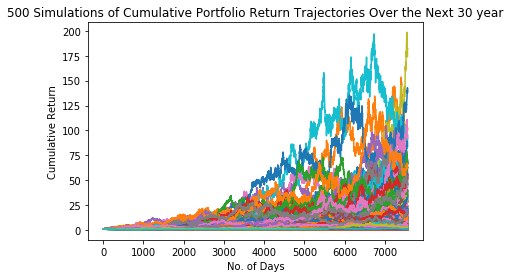

In [269]:
 # Visualize `500` simulations of the potential trajectories of the portfolio based on next 30 years
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 year"

ax = portfolio_cumulative_returns.plot(legend=None, title=plot_title)
ax.set(xlabel='No. of Days', ylabel='Cumulative Return' )

In [128]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1,:]
ending_cumulative_returns

0      33.878454
1       1.047916
2       2.126542
3       6.035502
4       2.639398
         ...    
495     1.473502
496     4.944415
497    17.504538
498     2.745009
499     0.860764
Name: 7560, Length: 500, dtype: float64

In [129]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns_20 = portfolio_cumulative_returns.iloc[20*252,:]
ending_cumulative_returns_20

0      22.645352
1       0.898538
2       1.667575
3       9.435372
4      20.342407
         ...    
495     1.037007
496     4.862520
497    14.357670
498     1.097895
499     0.886699
Name: 5040, Length: 500, dtype: float64

In [179]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     0.170608
0.95    39.395840
Name: 7560, dtype: float64

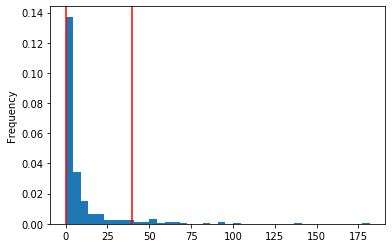

In [180]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=40)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [274]:
# The expected cumulative returns at 30 years for the 10th, 50th, and 90th percentile
expected_cumulative_returns = ending_cumulative_returns.quantile(q=[.1,.5,.9]).round(2)
#expected_cumulative_returns

In [276]:
print('Expected Cumulative Return at 30 year')
print(f'10th Percentile  : {expected_cumulative_returns[0.1]}')
print(f'50th Percentile  : {expected_cumulative_returns[0.5]}')
print(f'90th Percentile  : {expected_cumulative_returns[0.9]}')

Expected Cumulative Return at 30 year
10th Percentile  : 0.31
50th Percentile  : 2.71
90th Percentile  : 20.88


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [278]:
 # Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
expected_portfolio_return = expected_cumulative_returns*initial_investment
#expected_portfolio_return

In [279]:
print('Expected Portfolio Return at 30 year')
print(f'10th Percentile  : {expected_portfolio_return[0.1]}$')
print(f'50th Percentile  : {expected_portfolio_return[0.5]}$')
print(f'90th Percentile  : {expected_portfolio_return[0.9]}$')

Expected Portfolio Return at 30 year
10th Percentile  : 6200.0$
50th Percentile  : 54200.0$
90th Percentile  : 417600.0$


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [280]:
# Portfolio return for new initial investment
four_percent_return = expected_portfolio_return[0.1] * 0.04
four_percent_return

248.0

In [302]:
# The current projected annual income from Plaid Analysis
projected_annual_income = 6085.0

# Checks whether 4% return in retirement portfolio meets Projected annual income
status = 'does meet' if four_percent_return>projected_annual_income else 'doesn\'t meet'

print(f'The current projected annual income is {int(projected_annual_income)}$, 4% withdraw rate from the retirement portfolio is {int(four_percent_return)}$ {status} the value at the 10th percentile')


The current projected annual income is 6085$, 4% withdraw rate from the retirement portfolio is 248$ doesn't meet the value at the 10th percentile


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [307]:
# Initial investment after 50% increase in the original investment
increased_initial_investment = initial_investment * 1.50

# Calculate the 4% return for new initial investment
new_four_percent_return = (expected_cumulative_returns[0.9]*increased_initial_investment) * 0.04

# Checks whether 4% return in retirement portfolio meets Projected annual income
new_status = 'does exceeds' if new_four_percent_return>projected_annual_income else 'doesn\'t exceeds'

print(f'The 50% increase in the initial investment amount is {int(increased_initial_investment)}$, {new_status} the value at the 10th percentile which is {int(new_four_percent_return)}$ after 4% withdraw rate from the retirement portfolio')


The 50% increase in the initial investment amount is 30000$, does exceeds the value at the 10th percentile which is 25056$ after 4% withdraw rate from the retirement portfolio


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [308]:
df = portfolio_cumulative_returns * initial_investment
ax = df.swapaxes("index", "columns").quantile([0.05, 0.5, 0.95]).swapaxes('index', 'columns').plot(title='Portfolio Performance over Time')
ax.set(xlabel='No of Days', ylabel='Portfolio Return')

[Text(0, 0.5, 'Portfolio Return'), Text(0.5, 0, 'No of Days')]